In [1]:
import numpy as np
import pandas as pd

In [3]:
#loading the dataset
df=pd.read_csv("Predicting heart disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#describing the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# adding the rows names
name_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# read csv file with Cleveland heart diseases data
df = pd.read_csv("Predicting heart disease.csv", names=name_row)
df=df.iloc[1:]
df.head()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#looking for missing values
df.isnull()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#checking datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   303 non-null    object
 1   sex                   303 non-null    object
 2   chest_pain            303 non-null    object
 3   blood pressure        303 non-null    object
 4   serum_cholestoral     303 non-null    object
 5   fasting_blood_sugar   303 non-null    object
 6   electrocardiographic  303 non-null    object
 7   max_heart_rate        303 non-null    object
 8   induced_angina        303 non-null    object
 9   ST_depression         303 non-null    object
 10  slope                 303 non-null    object
 11  vessels               303 non-null    object
 12  thal                  303 non-null    object
 13  diagnosis             303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [22]:
#converting datatypes of dataframe
conv_dict={'age': int,'sex':int,'chest_pain':int,'blood pressure':int,'serum_cholestoral':int,'fasting_blood_sugar':int,'electrocardiographic':int,  'max_heart_rate':int,'induced_angina':int,'slope':int,'vessels':int,'thal':int, 'diagnosis':int}
df=df.astype(conv_dict)
df[['ST_depression']]=df[['ST_depression']].astype(float)
print(df.dtypes)

age                       int64
sex                       int64
chest_pain                int64
blood pressure            int64
serum_cholestoral         int64
fasting_blood_sugar       int64
electrocardiographic      int64
max_heart_rate            int64
induced_angina            int64
ST_depression           float64
slope                     int64
vessels                   int64
thal                      int64
diagnosis                 int64
dtype: object


In [23]:
#describing the target variable
df['diagnosis'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

Analyzing target value

In [24]:
df['diagnosis'].unique()

array([1, 0])

In [27]:
#checking correlation between columns
print(df.corr()["diagnosis"].abs().sort_values(ascending=False))

diagnosis               1.000000
induced_angina          0.436757
chest_pain              0.433798
ST_depression           0.430696
max_heart_rate          0.421741
vessels                 0.391724
slope                   0.345877
thal                    0.344029
sex                     0.280937
age                     0.225439
blood pressure          0.144931
electrocardiographic    0.137230
serum_cholestoral       0.085239
fasting_blood_sugar     0.028046
Name: diagnosis, dtype: float64


In [28]:
#the output shows most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

1    165
0    138
Name: diagnosis, dtype: int64


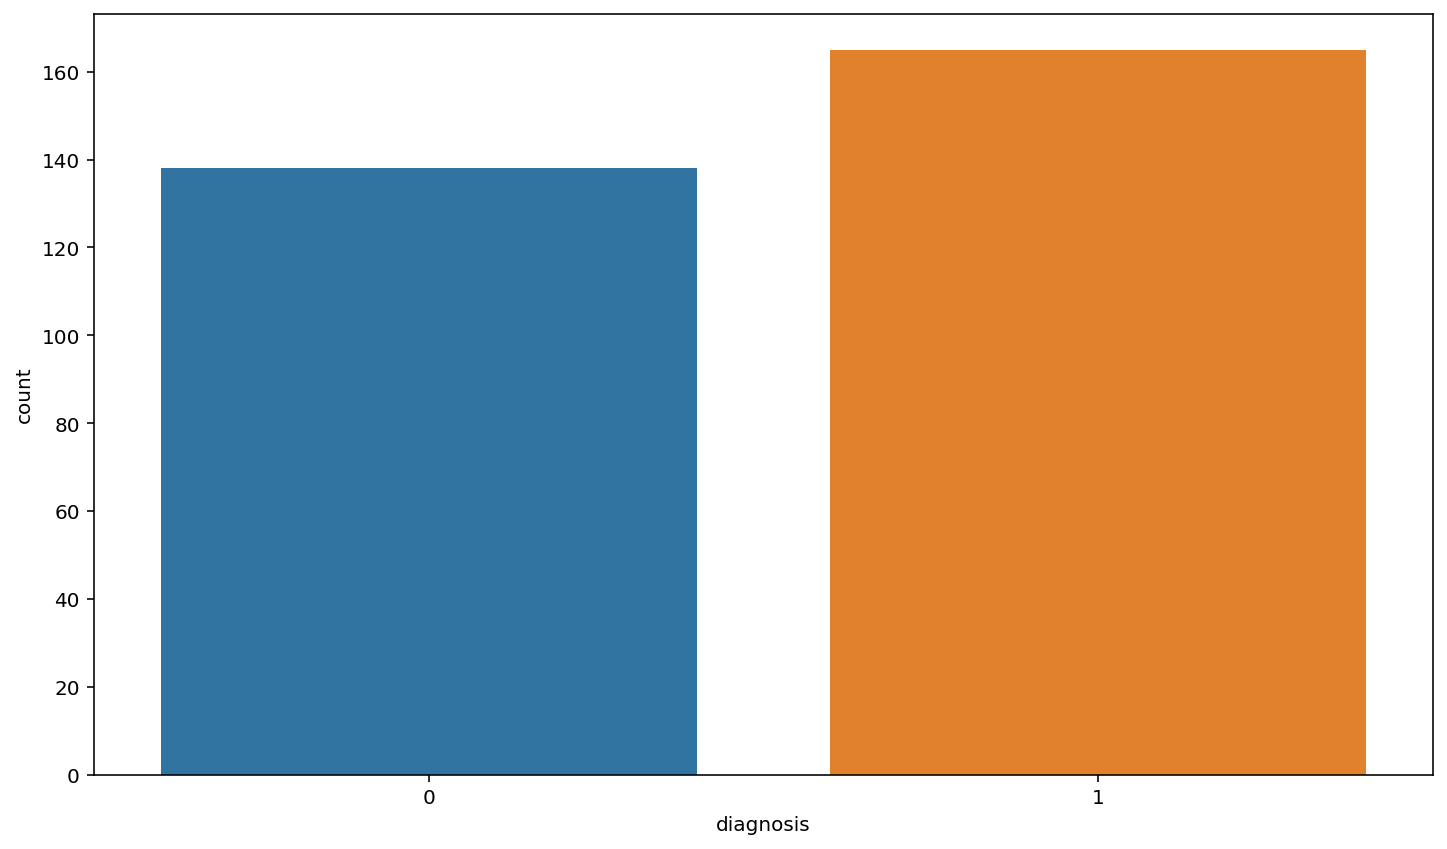

In [30]:
#Analyzing target value using graph
y = df["diagnosis"]

sns.countplot(y)
target_temp = df.diagnosis.value_counts()
print(target_temp)

In [31]:
#Analyzing 'sex' feature
df["sex"].unique()

array([1, 0])

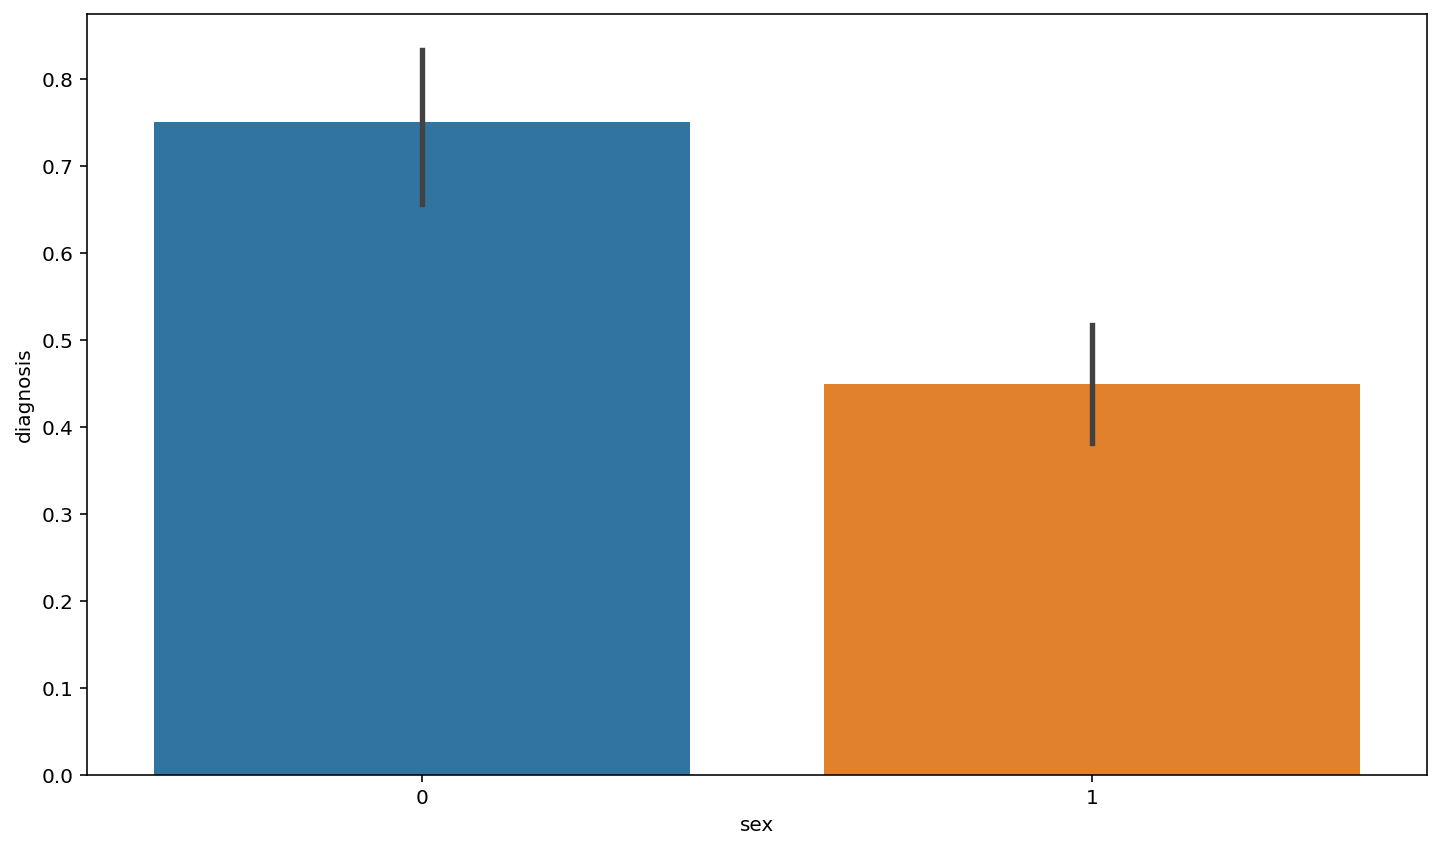

In [32]:
sns.barplot(df["sex"],y)

In [33]:
#Analyzing chest pain type
df['chest_pain'].unique()

array([3, 2, 1, 0])

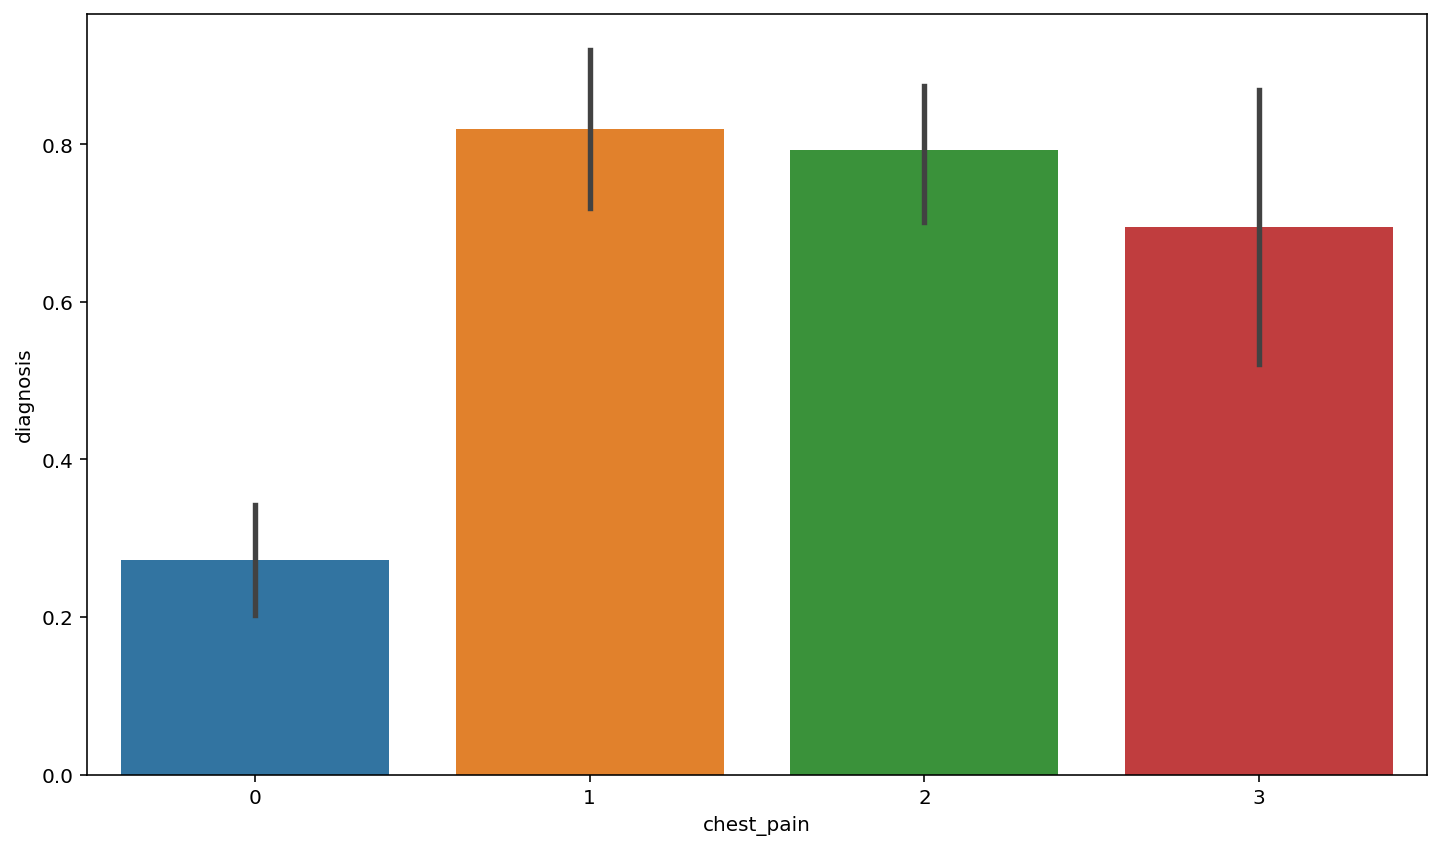

In [34]:
sns.barplot(df['chest_pain'],y)